**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not
 detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

 The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion




### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.image as mpimg


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Defining Path to the folders 

# ! unzip "gdrive/My Drive/Colab Notebooks/Data/CNN_assignment"
path = "gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/"
# path = "C:/<local path>/Skin cancer ISIC The International Skin Imaging Collaboration/"


Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(path + "Train/")
data_dir_test = pathlib.Path(path + "Test/")

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

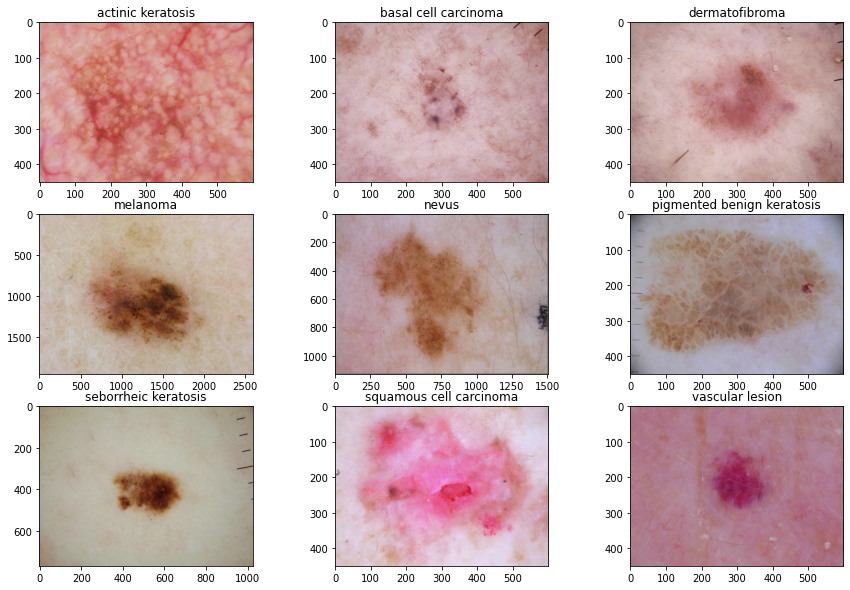

In [9]:
### your code goes here, you can use training or validation data to visualize

obj_path = path + "Train/"
plt.figure(figsize=(15,10))
# img_path = [path + each + '/' +os.listdir(path + each)[0] for each in class_names]
for i, obj in enumerate(class_names):
    img=mpimg.imread(obj_path + obj + '/' +os.listdir(obj_path + obj)[0])
    plt.subplot(3, 3, i+1)
    plt.title(obj)
    plt.imshow(img)
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo:
- Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function

model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='Adam',
              metrics=['accuracy'])


In [13]:
# View the summary of all layers
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [14]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 663s 3s/step - loss: 1.9271 - accuracy: 0.2891 - val_loss: 1.8334 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6936 - accuracy: 0.3895 - val_loss: 1.6170 - val_accuracy: 0.4474
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4454 - accuracy: 0.4927 - val_loss: 1.4270 - val_accuracy: 0.5324
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.2699 - accuracy: 0.5519 - val_loss: 1.2972 - val_accuracy: 0.5570
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1879 - accuracy: 0.5831 - val_loss: 1.3665 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1274 - accuracy: 0.6155 - val_loss: 1.3899 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 0.9632 - accuracy: 0.6685 - val_loss: 1.3226 - val_accuracy: 0.5638
Epoch 8/20
56

### Visualizing training results

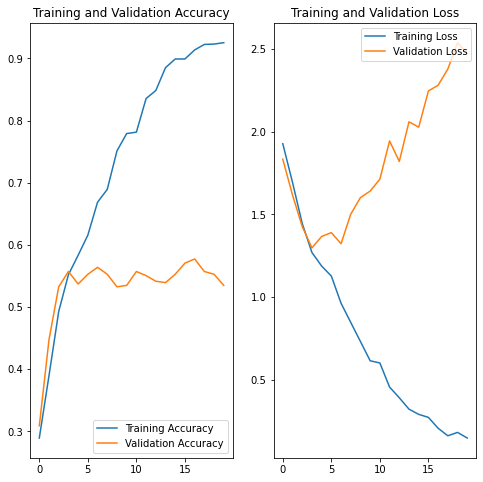

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: 
- Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Observation: **As we can see that there is sharp decline in accuracy in validation as compared to training and similarly there is spike in the loss for validation as compared to the training dataset.**

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

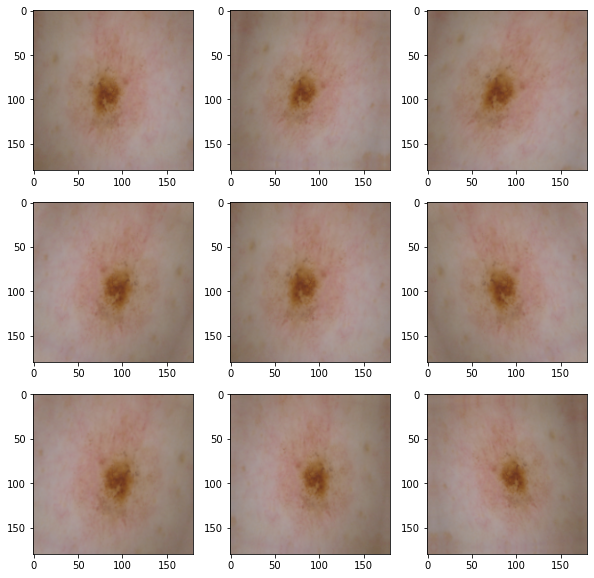

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmentated_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmentated_images.numpy()[0])
plt.show()

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

num_classes = len(class_names)

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
                    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
                    layers.experimental.preprocessing.RandomRotation(0.1),
                    layers.experimental.preprocessing.RandomZoom(0.1),
                    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.25),
                    layers.Dense(num_classes)
])

### Compiling the model

In [19]:
## Your code goes here

model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='Adam',
              metrics=['accuracy'])


### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 4s 51ms/step - loss: 2.0114 - accuracy: 0.2651 - val_loss: 1.7893 - val_accuracy: 0.4072
Epoch 2/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7167 - accuracy: 0.4062 - val_loss: 1.6163 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 1.6481 - accuracy: 0.4174 - val_loss: 1.6340 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5278 - accuracy: 0.4621 - val_loss: 1.4986 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4494 - accuracy: 0.4972 - val_loss: 1.4464 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3438 - accuracy: 0.5273 - val_loss: 1.4276 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3317 - accuracy: 0.5340 - val_loss: 1.3736 - val_accuracy: 0.5190
Epoch 8/20
56

### Visualizing the results

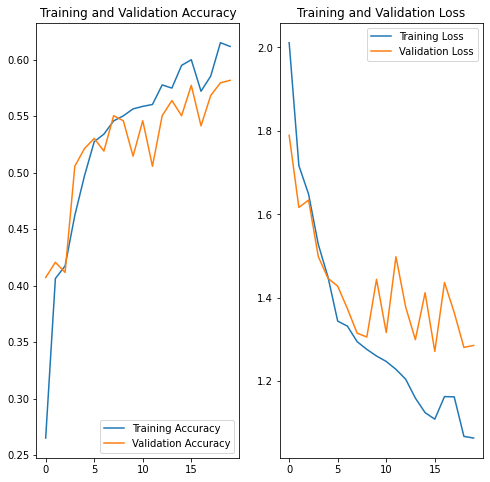

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: 
- Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Ans: **Although the problem of overfitting is removed but the model is now under fit as we can see from the accuracy of the model.**

#### **Todo:** 
- Find the distribution of classes in the training dataset.

***Context:*** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.


In [22]:
## Your code goes here.

from glob import glob
path_list = [x for x in glob(os.path.join(path+'Train','*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(path+'Train','*', '*.jpg')) ]
# len(lesion_list)

df_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path', 'Label'])
original_df.groupby(['Label']).count()

,Path
Label,
actinic keratosis,114
basal cell carcinoma,376
dermatofibroma,95
melanoma,438
nevus,357
pigmented benign keratosis,462
seborrheic keratosis,77
squamous cell carcinoma,181
vascular lesion,139


#### **Todo:** Write your findings here: 
#### Which class has the least number of samples?
Ans:  "seborrheic keratosis" has least number of samples. 

#### Which classes dominate the data in terms proportionate number of samples?
Ans: "pigmented benign keratosis" dominates in terms of sample proportion.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset = path + "Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F7B6CEBD0>: 100%|██████████| 500/500 [00:23<00:00, 21.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F7DF686D0>: 100%|██████████| 500/500 [00:23<00:00, 21.73 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F7DF5B8D0>:   0%|          | 1/500 [00:00<00:59,  8.42 Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0F7B735690>: 100%|██████████| 500/500 [00:23<00:00, 20.84 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F7F1BA4D0>: 100%|██████████| 500/500 [01:41<00:00,  4.94 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F0F7B74EB90>: 100%|██████████| 500/500 [01:36<00:00,  5.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0F7B67BCD0>: 100%|██████████| 500/500 [00:23<00:00, 20.86 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F7F1B80D0>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F7F1CD850>: 100%|██████████| 500/500 [00:23<00:00, 21.29 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F7B6B9D10>: 100%|██████████| 500/500 [00:23<00:00, 21.14 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033866.jpg_374a33c4-a442-4d7a-99fd-28a968842df6.jpg',
 'gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026525.jpg_ee9e8c5f-123b-495b-b9e0-2766f58d1e43.jpg',
 'gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032422.jpg_4e19dcaf-8411-4f43-bf17-f390d4658c9d.jpg',
 'gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030242.jpg_7e596c79-f3e5-4022-862f-0eb53b780767.jpg',
 'gdrive/My Drive/Colab Notebooks/Data/CNN_assignment/Skin cance

In [27]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [28]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [29]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [30]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
                    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
                    layers.experimental.preprocessing.RandomRotation(0.1),
                    layers.experimental.preprocessing.RandomZoom(0.1),
                    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here

model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='Adam',
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [39]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 50s 280ms/step - loss: 2.5524 - accuracy: 0.2687 - val_loss: 13.7166 - val_accuracy: 0.1114
Epoch 2/30
169/169 [==============================] - 46s 268ms/step - loss: 1.6899 - accuracy: 0.3583 - val_loss: 8.2685 - val_accuracy: 0.1908
Epoch 3/30
169/169 [==============================] - 47s 274ms/step - loss: 1.5805 - accuracy: 0.3869 - val_loss: 2.1402 - val_accuracy: 0.3972
Epoch 4/30
169/169 [==============================] - 48s 275ms/step - loss: 1.4323 - accuracy: 0.4353 - val_loss: 1.5845 - val_accuracy: 0.4143
Epoch 5/30
169/169 [==============================] - 47s 269ms/step - loss: 1.3557 - accuracy: 0.4564 - val_loss: 1.5954 - val_accuracy: 0.3541
Epoch 6/30
169/169 [==============================] - 48s 277ms/step - loss: 1.3032 - accuracy: 0.4789 - val_loss: 1.3703 - val_accuracy: 0.4454
Epoch 7/30
169/169 [==============================] - 48s 275ms/step - loss: 1.2590 - accuracy: 0.4842 - val_loss: 1.5125 - val_a

#### **Todo:**  Visualize the model results

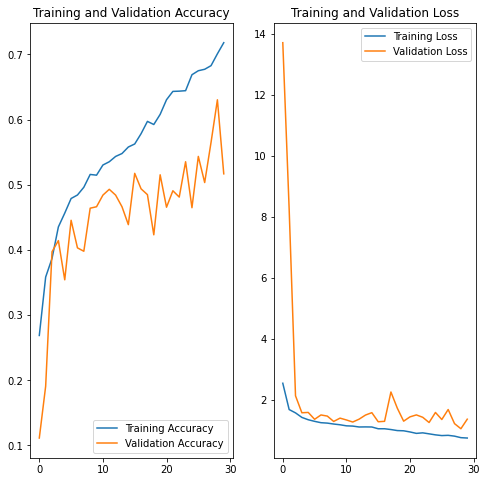

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes. we don't have the case of underfitting or overfitting. Class rebalancing helped in resolving the issue. 

**We got an accuracy of 77%.**
